In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


## Helping Functions

In [0]:
def sigmoid(y):
    return 1.0 / (1.0 + np.e**(-y))

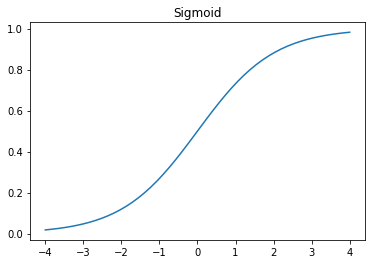

In [0]:
x = np.linspace(-4,4)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.show()

## Linear Model using Normal Equation

In [0]:
class LinearModel_NM:
  def fit(self, x, y):
    
    if x.shape[0] != len(y):
      print("Shapes Don't match")
      return 
    
    x_train = x.reshape(len(x), -1)
    x_train = np.concatenate((x_train, np.ones((len(x),1))), axis=1)
    x_trans = np.transpose(x_train)
    mat = np.matmul(x_trans, x_train)
    inv = np.linalg.inv(mat)
    z = np.matmul(inv, x_trans)
    
    vals = np.matmul(z, y)
    
    self.coef_ = vals[:-1]
    self.intercept_ = vals[-1] 
  
  
  def predict(self, x):
    
    try:
      x_pred = x.reshape(len(x), -1)
      y_pred = np.matmul(x_pred, self.coef_) + self.intercept_
      return y_pred
    except NameError:
      print("Data not fitted")
      return

In [0]:
x = np.array([[1,2],
    [1,6],
    [5,2],
    [7,5],
    [3,6]])

y = x[:, 0]*5 + x[:, 1] * 2 + 5

lm = LinearModel_NM()
lm.fit(x, y)
print("Coef: ", lm.coef_, "Intercept: ", lm.intercept_)

Coef:  [5. 2.] Intercept:  5.000000000000039


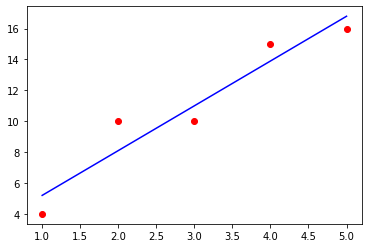

In [0]:
x = np.array([1,2,3,4,5])
y = np.array([4,10,10,15,16])
lm = LinearModel_NM()
lm.fit(x, y)
y_pred = lm.predict(x)
plt.plot(x,y,'ro')
plt.plot(x,y_pred,'b-')


\begin{equation*}
\mathbf{w} = \frac{(\sum y) (\sum x^2) -  (\sum x) (\sum xy)}
{n (\sum x^2) - (\sum x)^2 }  
\end{equation*}

\begin{equation*}
\mathbf{b} = \frac{(\sum xy) -  (\sum x) (\sum y)}
{n (\sum x^2) - (\sum x)^2 }  
\end{equation*}


$$\begin{equation*}
X = 
\begin{pmatrix} 
1 & x_{11} & \cdots  & x_{1m} 
\\ 1 & x_{21} & \cdots & x_{2m} 
\\ \vdots & \vdots & \ddots  & \vdots
\\ 1 & x_{n1} & \cdots & x_{nm}
\end{pmatrix}
\end{equation*}$$

$$\begin{equation*}
\beta = (X^T X)^{-1} X^Ty
\end{equation*}$$

## Linear model using Gradient Descent 

In [0]:
class LinearModel_GD:

    def __init__(self, epoch=1000, learning_rate=0.01):
        self.epoch = epoch
        self.learning_rate = learning_rate

    def fit(self, x, y):
        if x.shape[0] != len(y):
            print("Shapes Don't match")
            return 
        
        x_train = x.reshape(len(y), -1)
        n = len(x_train)
        
        self.coef_ = np.zeros(x_train.shape[-1])
        self.intercept_ = 0

        
        for i in range(self.epoch): 
            y_pred = np.matmul(x_train, self.coef_)  + self.intercept_
            D_coef = (-2/n) * np.matmul(y - y_pred, x_train)
            D_intercept = (-2/n) * sum(y - y_pred) 
            self.coef_ = self.coef_ - self.learning_rate * D_coef
            self.intercept_ = self.intercept_ - self.learning_rate * D_intercept

    def predict(self, x):
        try:
            x_pred = x.reshape(len(x), -1)
            y_pred = np.matmul(x_pred, self.coef_) + self.intercept_
            return y_pred
        except NameError:
            print("Data not fitted")
        return

    def evaluate(self, x, y):
        x_pred = x.reshape(len(y), -1)
        y_pred = np.matmul(x_pred, self.coef_) + self.intercept_
        return np.sum(y_pred*y_pred - y*y)/len(y)

In [0]:
x = np.array([[1,2],[1,6],[5,2],[7,5],[3,10],[2,6], [4,4]])

y = x[:, 0]*5 + x[:, 1] * 2 + 5

lm = LinearModel_GD(epoch=10000)
lm.fit(x, y)
print("Coef: ", lm.coef_, "Intercept: ", lm.intercept_)
lm.evaluate(x,y)

Coef:  [5. 2.] Intercept:  4.999999999852875


-1.496118784416467e-10

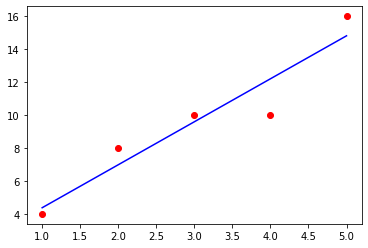

In [0]:
x = np.array([1,2,3,4,5])
y = np.array([4,8,10,10,16])
lm = LinearModel_GD(epoch=1000)
lm.fit(x, y)
y_pred = lm.predict(x)
plt.plot(x,y,'ro')
plt.plot(x,y_pred,'b-')
plt.show()

## Logistic using Gradient Descent

In [0]:
class LogisticRegression:
    def __init__(self, epoch=1000, learning_rate=0.01):
        self.epoch = epoch
        self.learning_rate = learning_rate

    def fit(self, x, y):
        if x.shape[0] != len(y):
            print("Shapes Don't match")
            return 
        
        x_train = x.reshape(len(y), -1)
        n = len(x_train)
        
        self.coef_ = np.random.randn(x_train.shape[-1])
        self.intercept_ = 0

        
        for i in range(self.epoch): 
            y_pred = self.predict(x_train)
            error = (y - y_pred)
            D_coef = np.matmul(error, x_train)/n 
            D_intercept = np.sum(error)/n
            self.coef_ = self.coef_ - self.learning_rate * D_coef
            self.intercept_ = self.intercept_ - self.learning_rate * D_intercept

    def predict(self, x):
        try:
            x_pred = x.reshape(len(x), -1)
            y_pred = np.matmul(x_pred, self.coef_) + self.intercept_
            return sigmoid(y_pred)
        except NameError:
            print("Data not fitted")
        return

In [0]:
x = np.array([2,2,-2,-2,2])
y = np.array([0,0,1,1,0])
lg = LogisticRegression(epoch=1000, learning_rate=0.01)
lg.fit(x, y)
lg.predict(np.array([2,-2]))

array([1.00000000e+00, 8.36828603e-16])

## K-means

In [0]:
class Kmeans:
    def __init__(self, clusters=2):
        self.clusters_ = clusters

    def fit(self, x, iters=5, disp=False):
        x_train = x.reshape(len(x), -1)
        self.centeroids_ = x_train[:self.clusters_,:].copy()

        
        for i in range(iters):
            dist_arr = self.compute_distance(x)
            i = 0
            for center in self.centeroids_:
                close_points = x_train[np.where(dist_arr == i)]
                self.centeroids_[i] = np.mean(close_points, axis=0)
                i = i + 1

            if disp: 
                plt.scatter(df[:, 0], df[:, 1], c=self.compute_distance(df))
                plt.scatter(self.centeroids_[:,0], self.centeroids_[:,1], s=300, c="black")
                plt.show()
    
    def compute_distance(self, x):
        dist_arr = None
        for center in self.centeroids_:
            dist = np.sqrt(np.sum((x - center)**2, axis=-1))
            if dist_arr is None:
                dist_arr = dist
            else:
                dist_arr = np.vstack(([dist_arr , dist]))
        return np.argmin(dist_arr, axis=0)

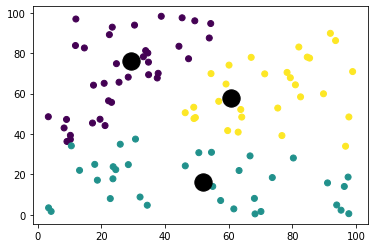

In [0]:
df = np.random.random([100,2])*100

km = Kmeans(clusters=3)
km.fit(df)

plt.scatter(df[:, 0], df[:, 1], c=km.compute_distance(df))
plt.scatter(km.centeroids_[:,0], km.centeroids_[:,1], s=300, c="black")

plt.show()

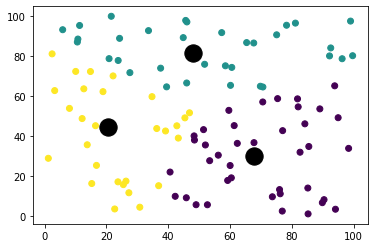

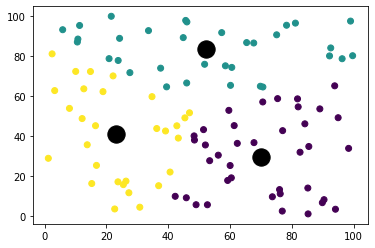

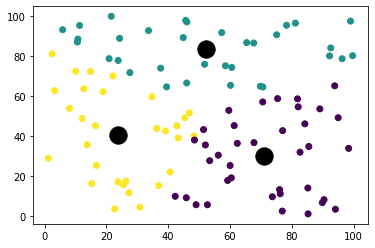

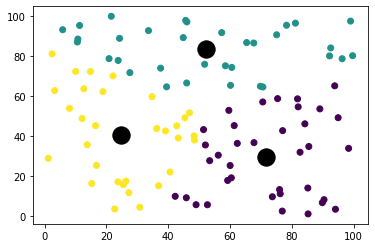

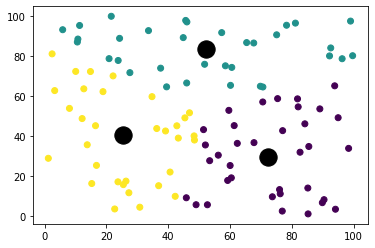

In [0]:
df = np.random.random([100,2])*100

km = Kmeans(clusters=3)
km.fit(df, disp=True)

## Neural Network

#### Helping Fucntion

In [0]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss
    
def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100

#### Neural Network class (3 layers)




In [0]:
class MyNN:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        self.lr = 0.5
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)
        
    def backprop(self):
        loss = error(self.a3, self.y)
        # print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()

    def fit(self, epochs=1000):
        for i in range(epochs):
            self.feedforward()
            self.backprop()

#### Trial

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dig = load_digits()
onehot_target = pd.get_dummies(dig.target)
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)
			
model = MyNN(x_train/16.0, np.array(y_train))
model.fit()		
	
print("Training accuracy : ", get_acc(x_train/16, np.array(y_train)))
print("Test accuracy : ", get_acc(x_val/16, np.array(y_val)))

Training accuracy :  99.93815708101423
Test accuracy :  97.22222222222221


#### Neural Network Class (Multiple Layers)

In [1]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k inxrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x] 
        zs = [] 
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

SyntaxError: ignored

## Misc

In [0]:
class Layer:
    
    #A building block. Each layer is capable of performing two things:    
    #- Process input to get output:           output = layer.forward(input)
    #- Propagate gradients through itself:    grad_input = layer.backward(input, grad_output)
    #Some layers also have learnable parameters which they update during layer.backward.
    
    def __init__(self):
        # Here we can initialize layer parameters (if any) and auxiliary stuff.
        # A dummy layer does nothing
        pass
    
    def forward(self, inputs):
        # Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        # A dummy layer just returns whatever it gets as input.
        return inputs
      
    def backward(self, inputs, grad_output):
        # Performs a backpropagation step through the layer, with respect to the given input.
        # To compute loss gradients w.r.t input, we need to apply chain rule (backprop):
        # d loss / d x  = (d loss / d layer) * (d layer / d x)
        # Luckily, we already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.
        # If our layer has parameters (e.g. dense layer), we also need to update them here using d loss / d layer
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = inputs.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

In [0]:
class ReLU(Layer):
    def __init__(self):
        # ReLU layer simply applies elementwise rectified linear unit to all inputs
        pass
    
    def forward(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        # Compute gradient of loss w.r.t. ReLU input
        relu_grad = input > 0
        return grad_output*relu_grad

In [0]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        # A dense layer is a layer which performs a learned affine transformation:
        # f(x) = <W*x> + b
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
       
        
    def forward(self,inputs):
        # Perform an affine transformation:
        # f(x) = <W*x> + b
        # input shape: [batch, input_units]
        # output shape: [batch, output units]
        
        return np.dot(inputs,self.weights) + self.biases
    
    def backward(self,inputs,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(inputs.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*inputs.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input